## Import packages

In [1]:
import scipy.io
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

## Define global variables

In [2]:
action_count = 27
subject_count = 8
trial_count = 4

## Process Depth Data
* Dimension is 240 x 320 x (Number of frames)  
* Convert 320 x 240 pixels to flat array
* Create constant columns for 'action', 'subject', 'trial', 'frame'

In [3]:
def import_depth_data(action, subject, trial):
    filename = f'data/Depth/a{action}_s{subject}_t{trial}_depth.mat'
    if Path(filename).is_file():
        mat = scipy.io.loadmat(filename)
        return mat['d_depth']
    else:
        return None

def transform_depth_data(action, subject, trial):
    rows = []
    data = import_depth_data(action, subject, trial)
    if data is None: return None
    for frame in range(data.shape[2]):
        pixels = data[:, :, frame].flatten()
        rows.append(pixels)
    result = np.insert(rows, 0, [[action], [subject], [trial], [frame]], axis=1)
    return np.array(result)

def transform_depth_data_to_df(action, subject, trial):
    data = transform_depth_data(action, subject, trial)
    if data is None: return None
    df = pd.DataFrame(data)
    df.columns = ['action', 'subject', 'trial', 'frame'] + [f'depth_{n}' for n in range(240 * 320)]
    return df

def export_depth_data_to_csv(action, subject, trial):
    df = transform_depth_data_to_df(action, subject, trial)
    if df is None: return None
    filename = f'a{action}_s{subject}_t{trial}_depth.csv'
    df.to_csv(filename, index=False)

def show_depth_image(action, subject, trial, frame):
    data = import_depth_data(action, subject, trial)
    if data is None: return None
    plt.imshow(data[:,:,frame], cmap='gray')
    plt.axis('off')
    plt.show()

## Process Inertial Data
* Dimension is (Number of sample) x 6  
* The 6 columns: acceleration for x, y, z, x-angular, y-angular, z-angular

In [4]:
def import_inertial_data(action, subject, trial):
    filename = f'data/Inertial/a{action}_s{subject}_t{trial}_inertial.mat'
    if Path(filename).is_file():
        mat = scipy.io.loadmat(filename)
        return mat['d_iner']
    else:
        return None
    
def transform_inertial_data(action, subject, trial):
    data = import_inertial_data(action, subject, trial)
    if data is None: return None
    result = np.insert(data, 0, [[action], [subject], [trial]], axis=1)
    return np.array(result)

def transform_inertial_data_to_df(action, subject, trial):
    data = transform_inertial_data(action, subject, trial)
    if data is None: return None
    df = pd.DataFrame(data)
    df.columns = ['action', 'subject', 'trial', 'x-accel', 'y-accel', 'z-accel', 'x-ang-accel', 'y-ang-accel', 'z-ang-accel']
    return df

def export_inertial_data_to_csv(action, subject, trial):
    df = transform_inertial_data_to_df(action, subject, trial)
    if df is None: return None
    filename = f'a{action}_s{subject}_t{trial}_inertial.csv'
    df.to_csv(filename, index=False)

## Process Skeleton Data
* Dimension is 20 x 3 x (Number of frame)
* The first dimension is the skeleton joints
* THe second dimension is the spatial coordinates (x, y, z)

In [5]:
def import_skeleton_data(action, subject, trial):
    filename = f'data/Skeleton/a{action}_s{subject}_t{trial}_skeleton.mat'
    if Path(filename).is_file():
        mat = scipy.io.loadmat(filename)
        return mat['d_skel']
    else:
        return None

def transform_skeleton_data(action, subject, trial):
    matrices = []
    data = import_skeleton_data(action, subject, trial)
    if data is None: return None
    for frame in range(data.shape[2]):
        skelecton_joints = [i + 1 for i in range(20)]
        matrix = data[:,:,frame]
        matrix = np.insert(matrix, 0, skelecton_joints, axis=1)
        matrix = np.insert(matrix, 0, frame, axis=1)
        matrices.append(matrix)
    result = np.vstack(tuple(matrices))
    result = np.insert(result, 0, [[action], [subject], [trial]], axis=1)
    return result

def transform_skeleton_data_to_df(action, subject, trial):
    data = transform_skeleton_data(action, subject, trial)
    if data is None: return None
    df = pd.DataFrame(data)
    df.columns = ['action', 'subject', 'trial', 'frame', 'skeleton_joint', 'x', 'y', 'z']
    return df

def export_inertial_data_to_csv(action, subject, trial):
    df = transform_skeleton_data_to_df(action, subject, trial)
    if df is None: return None
    filename = f'a{action}_s{subject}_t{trial}_skeleton.csv'
    df.to_csv(filename, index=False)

## Demonstration

In [6]:
df = transform_depth_data_to_df(1, 1, 1)
df.head()

,action,subject,trial,frame,depth_0,depth_1,depth_2,depth_3,depth_4,depth_5,...,depth_76790,depth_76791,depth_76792,depth_76793,depth_76794,depth_76795,depth_76796,depth_76797,depth_76798,depth_76799
0,1,1,1,47,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,47,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,47,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,47,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,47,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df = transform_inertial_data_to_df(1, 1, 1)
df.head()

,action,subject,trial,x-accel,y-accel,z-accel,x-ang-accel,y-ang-accel,z-ang-accel
0,1.0,1.0,1.0,-0.959473,-0.177734,-0.192871,5.221374,1.526718,0.152672
1,1.0,1.0,1.0,-0.961914,-0.153320,-0.159912,6.778626,1.954198,0.244275
2,1.0,1.0,1.0,-0.974609,-0.152832,-0.145996,11.267176,3.175573,1.099237
3,1.0,1.0,1.0,-0.941895,-0.135742,-0.127930,16.885496,4.732824,2.320611
4,1.0,1.0,1.0,-0.958252,-0.201416,-0.139404,16.030534,4.000000,0.366412


In [8]:
df = transform_skeleton_data_to_df(1, 1, 1)
df.head()

,action,subject,trial,frame,skeleton_joint,x,y,z
0,1.0,1.0,1.0,0.0,1.0,-0.045763,0.483985,2.830189
1,1.0,1.0,1.0,0.0,2.0,-0.034567,0.299454,2.877040
2,1.0,1.0,1.0,0.0,3.0,-0.030579,-0.049345,2.890448
3,1.0,1.0,1.0,0.0,4.0,-0.025585,-0.112093,2.839039
4,1.0,1.0,1.0,0.0,5.0,-0.198823,0.187045,2.877829


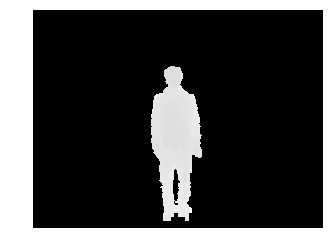

In [9]:
show_depth_image(1, 1, 1, 1)

In [10]:
# for i in range(1, action_count + 1):
#     for j in range(1, subject_count + 1):
#         for k in range(1, trial_count + 1):